In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from scipy import linalg
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
Df = pd.read_csv("cs-training.csv", index_col = 0)
print(len(Df))
Df = Df.dropna()
print(len(Df))
X_Cols = list(Df.columns)
X_Cols.remove("SeriousDlqin2yrs")
X = Df[X_Cols].to_numpy()
Y = Df["SeriousDlqin2yrs"].to_numpy()

150000
120269


In [3]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

In [4]:
len(X_Train)

80580

# Premilinaries

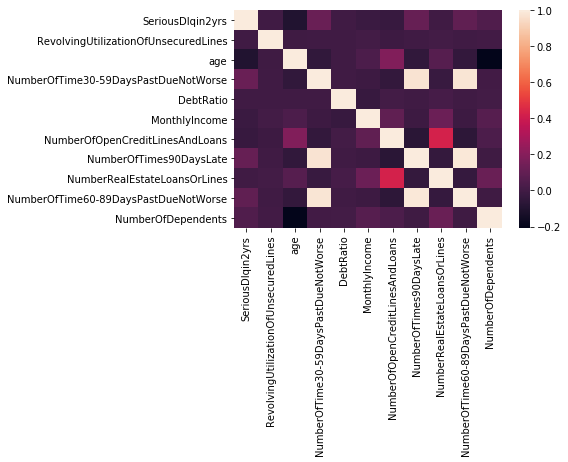

In [5]:
# Correlation Matrix
Corr_Matrix = Df.corr()
round(Corr_Matrix, 2)
Fig = sns.heatmap(Corr_Matrix)
Figure = Fig.get_figure()    
Figure.savefig('CorrPlot.pdf', bbox_inches = "tight")

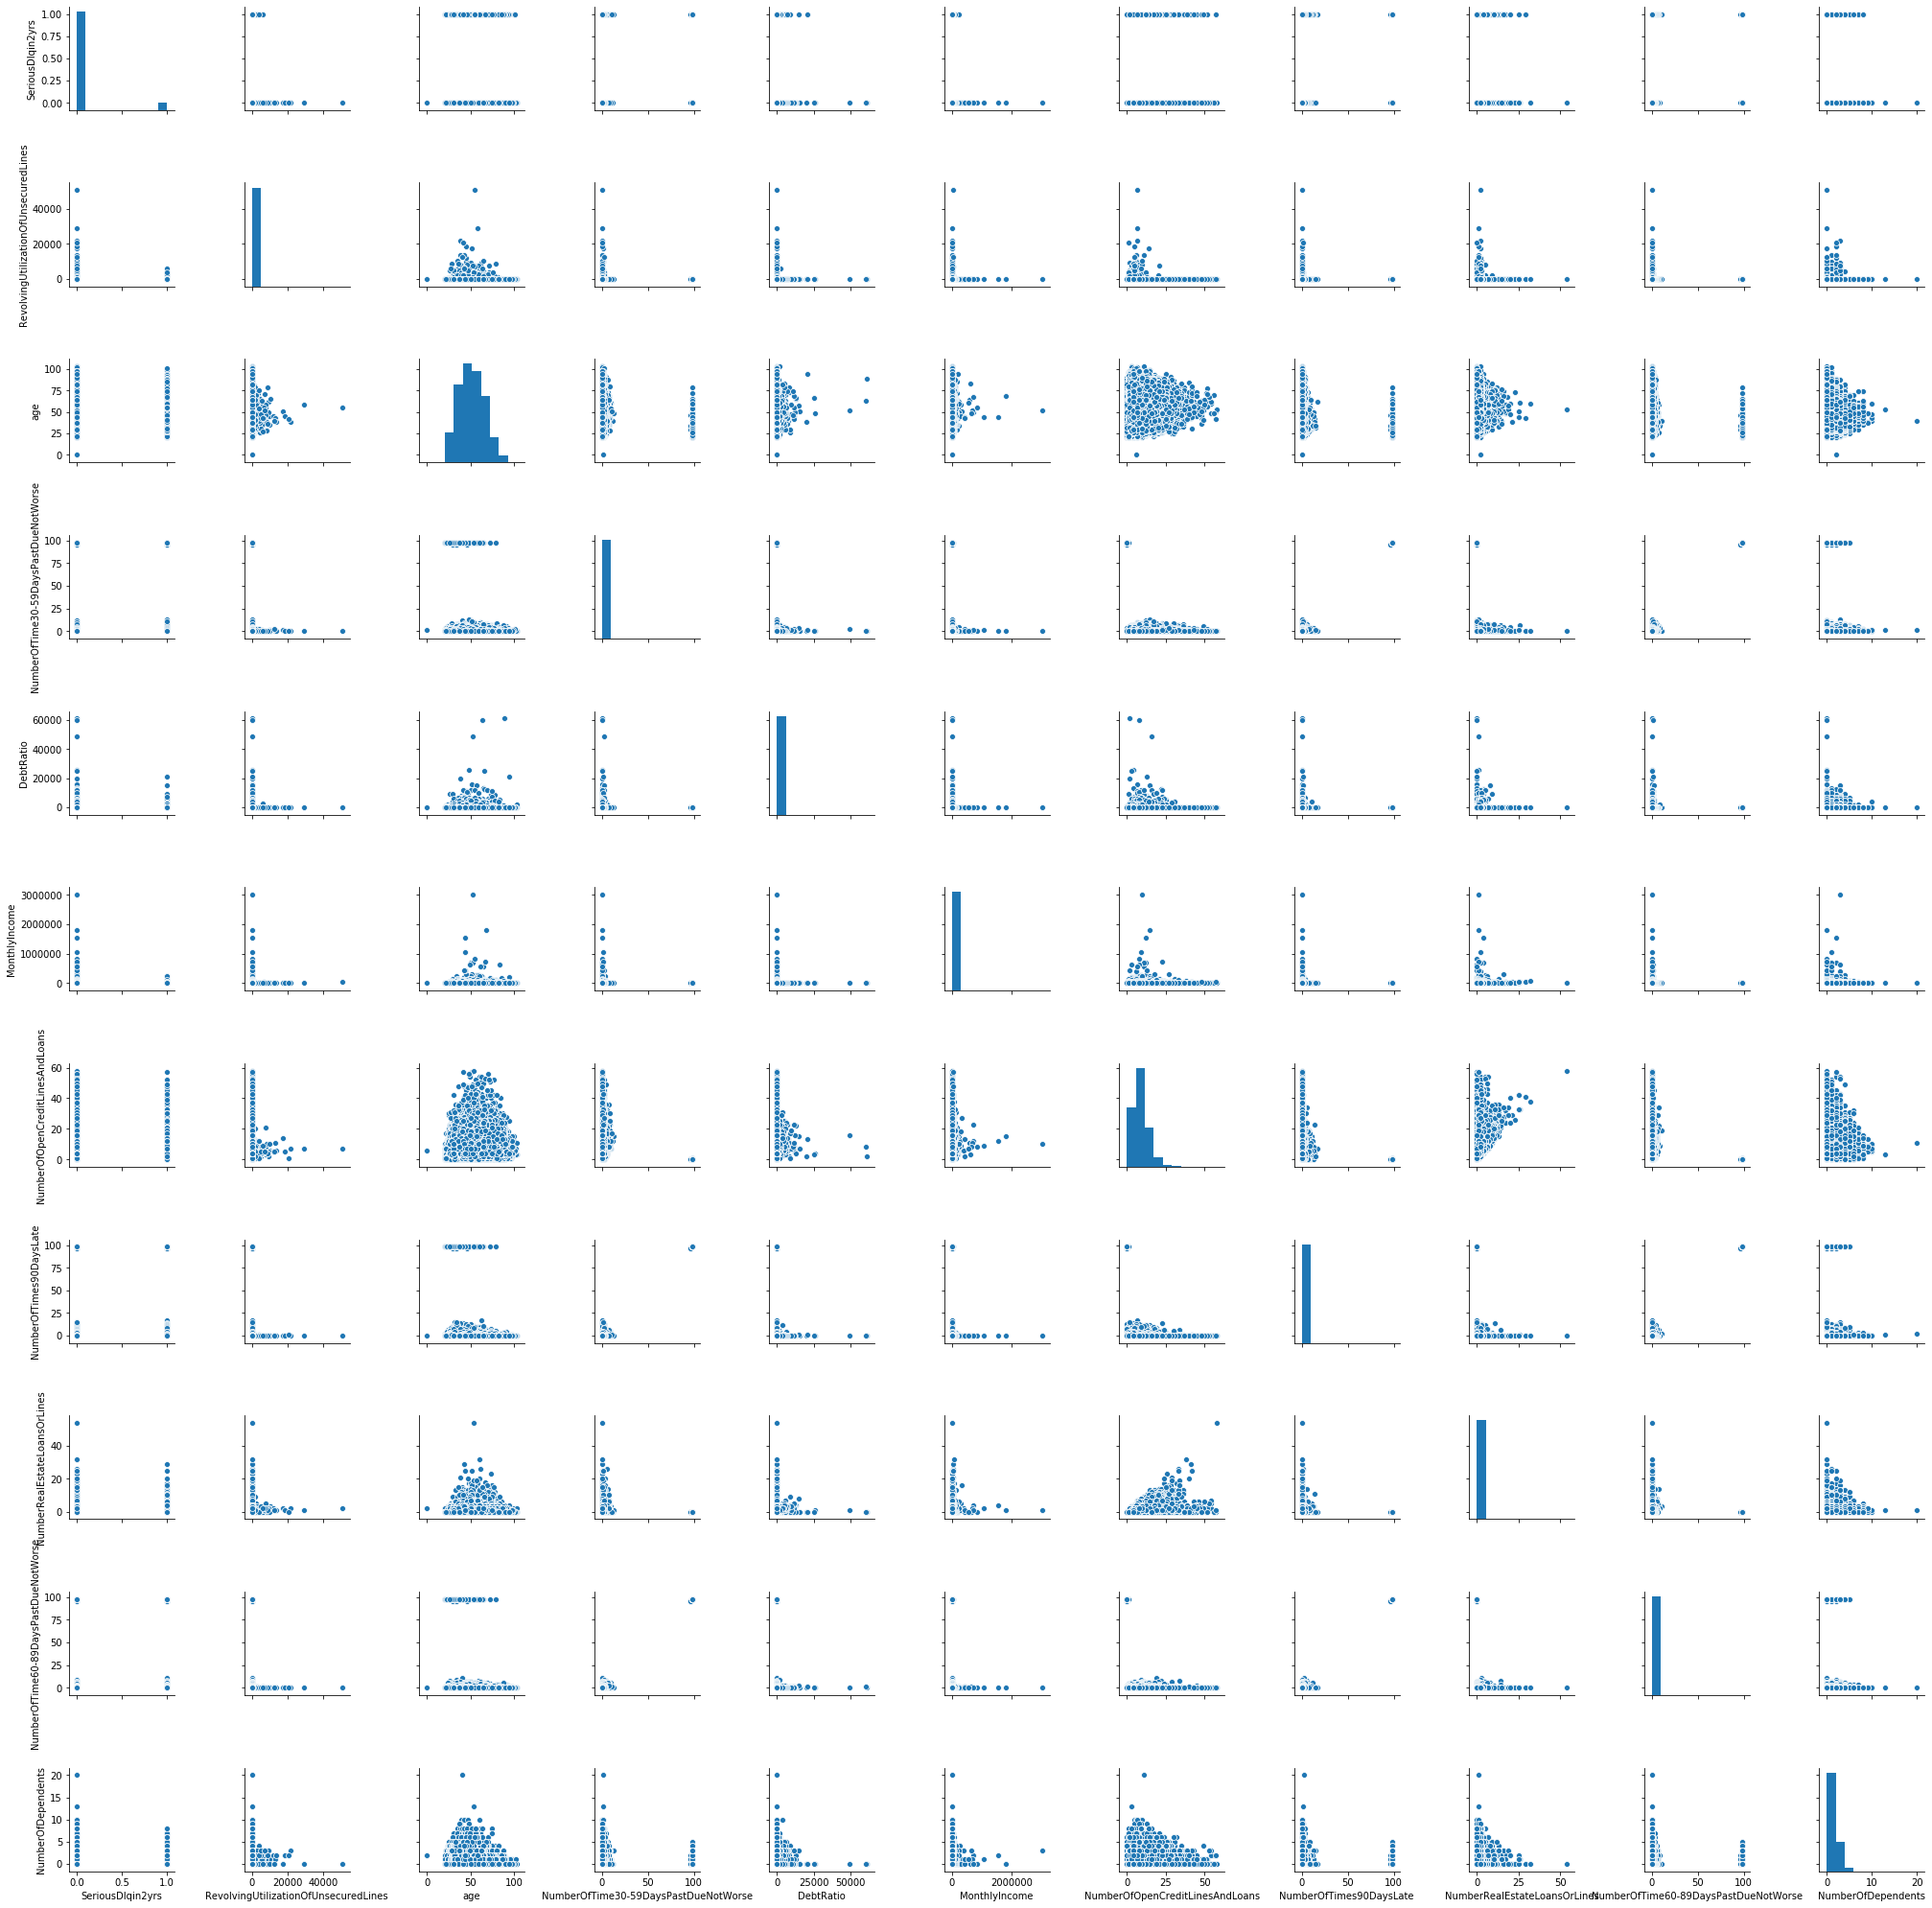

In [6]:
### Two by Two Plots
Plt = sns.pairplot(Df)
Plt

# Fisher LDA

In [7]:
mu = np.mean(X_Train)
X_Train_Demeaned = (X_Train - mu).T
X_Test_Demeaned = (X_Test - mu).T
S_t = np.cov(X_Train_Demeaned)
S_w = np.zeros(S_t.shape)
for c in np.unique(Y_Train):
    S_w += np.cov(X_Train_Demeaned[:, Y_Train == c])

S_b = S_t - S_w

Vals, Vecs = linalg.eig(np.linalg.inv(S_w)@S_b)
Vecs = Vecs[:, np.argsort(Vals)]

W_lda = Vecs[:, -1:].real

X_Train_Lda = (W_lda.T@X_Train_Demeaned).T
X_Test_Lda = (W_lda.T@X_Test_Demeaned).T

print("Scores for Train Are:")
print(np.mean(X_Train_Lda[Y_Train == 0]), np.mean(X_Train_Lda[Y_Train == 1]))

print("Scores for Test Are:")
print(np.mean(X_Test_Lda[Y_Test == 0]), np.mean(X_Test_Lda[Y_Test == 1]))

Scores for Train Are:
85.44373421735314 83.43138114565562
Scores for Test Are:
85.49241455138895 83.98570707596363


In [8]:
Y_Train

array([0, 0, 0, ..., 0, 1, 0])

# Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
Clf = LogisticRegression(random_state = 0, max_iter = 1000).fit(X_Train, Y_Train)
Probs = Clf.predict_proba(X_Train)

Train_Predicted = np.zeros(len(Probs))
for i in range(len(Probs)):
    if (Probs[i, 0] > Probs[i, 1]):  
        Train_Predicted[i] = 0
    else:
        Train_Predicted[i] = 1

Equal = 0
for i in range(len(Y_Train)):
    if (Y_Train[i] == Train_Predicted[i]):
        Equal = Equal + 1      

Score = Probs[:, 1]/(1 - Probs[:, 1])
print("Scores for Train Are:")
print(np.mean(Score[Y_Train == 0]), np.mean(Score[Y_Train == 1]))

Scores for Train Are:
0.09199179721400955 0.3332044933838555


In [10]:
print("Classification Accuracy on Training Set is:")
print(Equal/len(Y_Train))

Classification Accuracy on Training Set is:
0.9315711094564408


In [11]:
Probs = Clf.predict_proba(X_Test)
Test_Predicted = np.zeros(len(Probs))

for i in range(len(Probs)):
    if (Probs[i, 0] > Probs[i, 1]):  
        Test_Predicted[i] = 0
    else:
        Test_Predicted[i] = 1


Equal = 0
for i in range(len(Y_Test)):
    if (Y_Test[i] == Test_Predicted[i]):
        Equal = Equal + 1
        
Score = Probs[:, 1]/(1 - Probs[:, 1])
print("Scores for Test Are:")
print(np.mean(Score[Y_Test == 0]), np.mean(Score[Y_Test == 1]))

Scores for Test Are:
0.08131754160975689 0.27448396478956927


In [12]:
print("Classification Accuracy on Test Set is:")
Equal/len(Y_Test)

Classification Accuracy on Test Set is:


0.9304845171206128

# Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
Clf = RandomForestClassifier(max_depth = 5, random_state = 0)
Clf.fit(X_Train, Y_Train)
Probs = Clf.predict_proba(X_Train)

Train_Predicted = np.zeros(len(Probs))
for i in range(len(Probs)):
    if (Probs[i, 0] > Probs[i, 1]):  
        Train_Predicted[i] = 0
    else:
        Train_Predicted[i] = 1

Equal = 0
for i in range(len(Y_Train)):
    if (Y_Train[i] == Train_Predicted[i]):
        Equal = Equal + 1      

Score = Probs[:, 1]/(1 - Probs[:, 1])
print("Scores for Train Are:")
print(np.mean(Score[Y_Train == 0]), np.mean(Score[Y_Train == 1]))

Scores for Train Are:
0.07023938518560487 0.39612069415283807


In [14]:
print("Classification Accuracy on Training Set is:")
print(Equal/len(Y_Train))

Classification Accuracy on Training Set is:
0.9345619260362373


In [15]:
Probs = Clf.predict_proba(X_Test)

Test_Predicted = np.zeros(len(Probs))

for i in range(len(Probs)):
    if (Probs[i, 0] > Probs[i, 1]):  
        Test_Predicted[i] = 0
    else:
        Test_Predicted[i] = 1

Equal = 0
for i in range(len(Y_Test)):
    if (Y_Test[i] == Test_Predicted[i]):
        Equal = Equal + 1

Score = Probs[:, 1]/(1 - Probs[:, 1])
print("Scores for Test Are:")
print(np.mean(Score[Y_Test == 0]), np.mean(Score[Y_Test == 1]))

Scores for Test Are:
0.07135186453471327 0.3791356430665598


In [16]:
print("Classification Accuracy on Test Set is:")
Equal/len(Y_Test)

Classification Accuracy on Test Set is:


0.9323994053768047

In [17]:
X_Train.shape

(80580, 10)

In [18]:
np.sum(Y_Train)

5575

In [19]:
Y_Train.shape
X_Train.shape
# len(Y_Train)

(80580, 10)

In [20]:
Default = []
for i in range(len(X_Train)):
    if(Y_Train[i] == 1):
        Default.append(X_Train[i])
Default = np.asarray(Default)
        
Resampled = []
Resampled_y = []
Target = X_Train.shape[0]/2
Current = np.sum(Y_Train)

while(Current <= Target):
    Index = np.random.choice(Default.shape[0], 1)  
    Resampled.append(Default[Index].squeeze())
    Resampled_y.append(1)
    Current += 1
    Target += .498
    
X_Train = np.concatenate((X_Train, np.asarray(Resampled)))
Y_Train = np.concatenate((Y_Train, np.asarray(Resampled_y)))

# Dense NN

In [21]:
# Class_Weight = {1: 0.95,0: 0.05}
import random
random.seed(1)
Model_in = keras.Input(shape = (10, ))
X = layers.Dense(10, activation = "relu")(Model_in)
X2 = layers.Dense(10, activation= "relu")(X)
X3 = layers.Dense(10, activation= "relu")(X2)
X4 = layers.Dense(10, activation= "relu")(X3)

Out = layers.Dense(1, activation= "sigmoid")(X4)

Model = keras.Model(Model_in, Out)
Model.compile(optimizer = 'adam', loss = 'binary_crossentropy')
Model.fit(X_Train, Y_Train, epochs = 100,
                batch_size = 128,
                shuffle = True)

Epoch 1/100
1170/1170 [==============================] - 2s 987us/step - loss: 1.7073
Epoch 2/100
1170/1170 [==============================] - 1s 918us/step - loss: 1.0539
Epoch 3/100
1170/1170 [==============================] - 2s 1ms/step - loss: 0.9618
Epoch 4/100
1170/1170 [==============================] - 2s 2ms/step - loss: 0.7582
Epoch 5/100
1170/1170 [==============================] - 2s 1ms/step - loss: 0.7611
Epoch 6/100
1170/1170 [==============================] - 1s 1ms/step - loss: 0.8066
Epoch 7/100
1170/1170 [==============================] - 1s 1ms/step - loss: 0.7324
Epoch 8/100
1170/1170 [==============================] - 1s 1ms/step - loss: 0.5777
Epoch 9/100
1170/1170 [==============================] - 1s 1ms/step - loss: 0.6036
Epoch 10/100
1170/1170 [==============================] - 1s 1ms/step - loss: 0.6342
Epoch 11/100
1170/1170 [==============================] - 1s 1ms/step - loss: 0.6488
Epoch 12/100
1170/1170 [==============================] - 1s 1ms/step 

1170/1170 [==============================] - 1s 1ms/step - loss: 0.4860
Epoch 95/100
1170/1170 [==============================] - 1s 1ms/step - loss: 0.4879
Epoch 96/100
1170/1170 [==============================] - 1s 1ms/step - loss: 0.4863A: 0s -
Epoch 97/100
1170/1170 [==============================] - 1s 1ms/step - loss: 0.4888
Epoch 98/100
1170/1170 [==============================] - 1s 1ms/step - loss: 0.4874
Epoch 99/100
1170/1170 [==============================] - 1s 1ms/step - loss: 0.4870
Epoch 100/100
1170/1170 [==============================] - 1s 1ms/step - loss: 0.4866


In [22]:
Probs = Model.predict(X_Train)
Probs

array([[0.11589515],
       [0.19759074],
       [0.14599547],
       ...,
       [0.85877407],
       [0.4121329 ],
       [0.5329002 ]], dtype=float32)

In [23]:
Probs.shape

(149734, 1)

In [24]:
Train_Predicted = np.zeros(len(Probs))
for i in range(len(Probs)):
    if (Probs[i] < 0.5):  
        Train_Predicted[i] = 0
    else:
        Train_Predicted[i] = 1

Equal = 0
Default = 0
Non_Default = 0
for i in range(len(Y_Train)):
    if(Y_Train[i] == 1):
        if(Y_Train[i] == Train_Predicted[i]):
            Equal += 1
            Default += 1
    else:
        if(Y_Train[i] == Train_Predicted[i]):
            Equal += 1
            Non_Default += 1
        
Probs

Score = Probs/(1 - Probs)
print("Scores for Train Are:")
print(np.mean(Score[Y_Train == 0]), np.mean(Score[Y_Train == 1]))

Scores for Train Are:
1.0912266 6.80118


In [25]:
np.sum(Train_Predicted)

65379.0

In [26]:
print("Classification Accuracy on Training Set is:")
print(Equal/len(Y_Train))
print("Classification Accuracy on Non-Default Training Set is:")
print(Non_Default/(len(Y_Train) - np.sum(Y_Train)))
print("Classification Accuracy on Default Training Set is:")
print(Default/np.sum(Y_Train))

Classification Accuracy on Training Set is:
0.7684961331427732
Classification Accuracy on Non-Default Training Set is:
0.8312512499166722
Classification Accuracy on Default Training Set is:
0.705509240054062
